In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from multinomial_kernel import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

In [3]:
raw_train_data = "../../data/train.csv"
raw_test_data = "../../data/test.csv"

In [4]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')


# Wrapper method

In [5]:
regularizers = np.array([0.01, 0.05, 0.1])
learning_rates = np.array([0.01, 0.1])

params_combination = np.array(
    np.meshgrid(regularizers, learning_rates)
).T.reshape(-1, 2)

cross_validation_accuracies = []
cross_validation_accuracies_means = []
train_errors = []
validation_errors = []

for reg, l_rate in params_combination:
    model = MultinomialLogisticRegression(learning_rate=l_rate, num_iterations=800, regularizer=reg)
    model.cross_validation(X_train, y_train)
    print("Learning rate:", l_rate)
    print("Regularization:", reg)
    cross_validation_accuracies.append(model.cross_validation_accuracy)
    cross_validation_accuracies_means.append(np.mean(model.cross_validation_accuracy))
    train_errors.append(model.cross_valid_train_errors)
    validation_errors.append(model.cross_valid_valid_errors)
    
    print(np.mean(model.cross_validation_accuracy))

[    0  7498 14995 22492 29989]
[    0  7498 14995 22492 29989]
Epoch 0, cross entropy loss: 1.0986122886681096


/Users/rafaelapinter/Library/Mobile Documents/com~apple~CloudDocs/1.UdeM/github-projects/extreme-weather-events-ift6380/notebooks/logistic_regression/multinomial_kernel.py:104: RuntimeWarning: invalid value encountered in double_scalars
  return -np.sum(np.log(probs[range(len(y)), y.astype(int)])) / len(


Epoch 100, cross entropy loss: 0.9501298154704545
Epoch 200, cross entropy loss: 0.8792929785252196
Epoch 300, cross entropy loss: 0.8350867709219738
Epoch 400, cross entropy loss: 0.8052076194391802
Epoch 500, cross entropy loss: 0.7839014278919796
Epoch 600, cross entropy loss: 0.7680894699929763
Epoch 700, cross entropy loss: 0.7559842531420717


/Users/rafaelapinter/miniconda3/envs/dc1-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rafaelapinter/miniconda3/envs/dc1-env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9479755589260906
Epoch 200, cross entropy loss: 0.8760881667776241
Epoch 300, cross entropy loss: 0.8312034484303122
Epoch 400, cross entropy loss: 0.8008235072649074
Epoch 500, cross entropy loss: 0.7791147032747601
Epoch 600, cross entropy loss: 0.7629629139395093
Epoch 700, cross entropy loss: 0.7505629873230977
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9515855171138582
Epoch 200, cross entropy loss: 0.880698984505383
Epoch 300, cross entropy loss: 0.836229179188427
Epoch 400, cross entropy loss: 0.8059981161343677
Epoch 500, cross entropy loss: 0.7842945413454416
Epoch 600, cross entropy loss: 0.7680607192638882
Epoch 700, cross entropy loss: 0.7555222049832551
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9575951083146982
Epoch 200, cross entropy loss: 0.8912449271587208
Epoch 300, cross entropy loss: 0.850058799889287
Epoch 400

In [7]:
regularizers = np.array([0.01, 0.05, 0.1])
learning_rates = np.array([0.001, 0.01, 0.1])

params_combination = np.array(
    np.meshgrid(regularizers, learning_rates)
).T.reshape(-1, 2)

cross_validation_accuracies = []
cross_validation_accuracies_means = []
train_errors = []
validation_errors = []

for reg, l_rate in params_combination:
    model = MultinomialLogisticRegression(learning_rate=l_rate, num_iterations=800, regularizer=reg)
    model.cross_validation(X_train, y_train)
    print("Learning rate:", l_rate)
    print("Regularization:", reg)
    cross_validation_accuracies.append(model.cross_validation_accuracy)
    cross_validation_accuracies_means.append(np.mean(model.cross_validation_accuracy))
    train_errors.append(model.cross_valid_train_errors)
    validation_errors.append(model.cross_valid_valid_errors)
    
    print(np.mean(model.cross_validation_accuracy))

[    0  7498 14995 22492 29989]
[    0  7498 14995 22492 29989]
Epoch 0, cross entropy loss: 1.0986122886681096


/Users/rafaelapinter/Library/Mobile Documents/com~apple~CloudDocs/1.UdeM/github-projects/extreme-weather-events-ift6380/notebooks/multinomial_kernel.py:104: RuntimeWarning: invalid value encountered in double_scalars
  return -np.sum(np.log(probs[range(len(y)), y.astype(int)])) / len(


Epoch 100, cross entropy loss: 1.0722998972186895
Epoch 200, cross entropy loss: 1.0541240378000185
Epoch 300, cross entropy loss: 1.0407770418451967
Epoch 400, cross entropy loss: 1.0304141336304076
Epoch 500, cross entropy loss: 1.0219747696440882
Epoch 600, cross entropy loss: 1.0148280245748518
Epoch 700, cross entropy loss: 1.00858509329827


/Users/rafaelapinter/miniconda3/envs/dc1-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rafaelapinter/miniconda3/envs/dc1-env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 1.071582533088183
Epoch 200, cross entropy loss: 1.0529069928457107
Epoch 300, cross entropy loss: 1.0391941512232514
Epoch 400, cross entropy loss: 1.0285529757667775
Epoch 500, cross entropy loss: 1.0198960955066707
Epoch 600, cross entropy loss: 1.0125761420196902
Epoch 700, cross entropy loss: 1.0061936948560344
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 1.0734647894607419
Epoch 200, cross entropy loss: 1.0559753321709122
Epoch 300, cross entropy loss: 1.04303079176171
Epoch 400, cross entropy loss: 1.0328978758980856
Epoch 500, cross entropy loss: 1.0245821086874118
Epoch 600, cross entropy loss: 1.0174929730568323
Epoch 700, cross entropy loss: 1.0112670194602436
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 1.0708106426442894
Epoch 200, cross entropy loss: 1.0516202375651733
Epoch 300, cross entropy loss: 1.0375521952544704
Epoch 400

In [60]:
np.max(np.mean(np.array(cross_validation_accuracies)[:,1:], axis=1))

0.8091299469907995

In [61]:
np.argmax(np.mean(np.array(cross_validation_accuracies)[:,1:], axis=1))

1

In [62]:
params_combination[np.argmax(np.mean(np.array(cross_validation_accuracies)[:,1:], axis=1))]

array([0.01, 0.1 ])

In [51]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7321367608559549
Epoch 200, cross entropy loss: 0.7025375952097122
Epoch 300, cross entropy loss: 0.6901944412188235
Epoch 400, cross entropy loss: 0.6823958055239414
Epoch 500, cross entropy loss: 0.6768100367932977
Epoch 600, cross entropy loss: 0.6724842026230518
Epoch 700, cross entropy loss: 0.6689317377061312
Epoch 800, cross entropy loss: 0.6659021679045767
Epoch 900, cross entropy loss: 0.663262203066028
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10302   217  1110]
 [  341   230     7]
 [ 1123     9  1432]] 

Accuracy:
0.81 

Precision:
0.6472 

Recall:
0.6141 

F1 Score:
0.6302


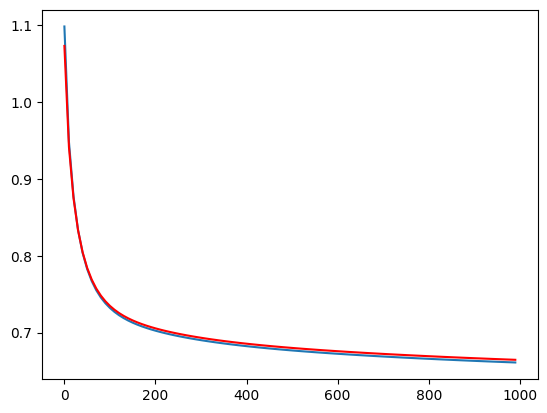

In [52]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

predictions_2023-10-25 23:37:22.889423_opt_multinomial_more_training

In [6]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7321367608559549
Epoch 200, cross entropy loss: 0.7025375952097122
Epoch 300, cross entropy loss: 0.6901944412188235
Epoch 400, cross entropy loss: 0.6823958055239414
Epoch 500, cross entropy loss: 0.6768100367932977
Epoch 600, cross entropy loss: 0.6724842026230518
Epoch 700, cross entropy loss: 0.6689317377061312
Epoch 800, cross entropy loss: 0.6659021679045767
Epoch 900, cross entropy loss: 0.663262203066028
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10302   217  1110]
 [  341   230     7]
 [ 1123     9  1432]] 

Accuracy:
0.81 

Precision:
0.6472 

Recall:
0.6141 

F1 Score:
0.6302


In [7]:
pd.Series(predictions).value_counts(normalize=True)

0    0.796561
2    0.172568
1    0.030871
dtype: float64

0.771 - submission

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7321367608559549
Epoch 200, cross entropy loss: 0.7025375952097122
Epoch 300, cross entropy loss: 0.6901944412188235
Epoch 400, cross entropy loss: 0.6823958055239414
Epoch 500, cross entropy loss: 0.6768100367932977
Epoch 600, cross entropy loss: 0.6724842026230518
Epoch 700, cross entropy loss: 0.6689317377061312
Epoch 800, cross entropy loss: 0.6659021679045767
Epoch 900, cross entropy loss: 0.663262203066028
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10302   217  1110]
 [  341   230     7]
 [ 1123     9  1432]] 

Accuracy:
0.81 

Precision:
0.6472 

Recall:
0.6141 

F1 Score:
0.6302


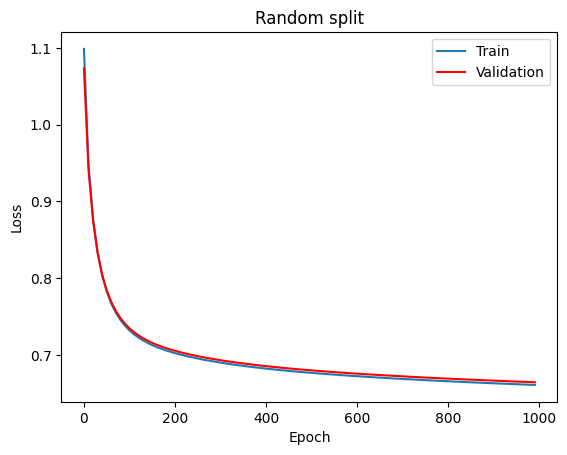

In [10]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors,
    label="Train"
)

plt.plot(
    model.iters,
    model.valid_errors,
    label="Validation",
    color='r'
)

plt.ylabel("Loss")
plt.title("Random split")
plt.xlabel("Epoch")
plt.legend()
plt.show()

---

In [7]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')


In [11]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7321367608559549
Epoch 200, cross entropy loss: 0.7025375952097122
Epoch 300, cross entropy loss: 0.6901944412188235
Epoch 400, cross entropy loss: 0.6823958055239414
Epoch 500, cross entropy loss: 0.6768100367932977
Epoch 600, cross entropy loss: 0.6724842026230518
Epoch 700, cross entropy loss: 0.6689317377061312
Epoch 800, cross entropy loss: 0.6659021679045767
Epoch 900, cross entropy loss: 0.663262203066028
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10302   217  1110]
 [  341   230     7]
 [ 1123     9  1432]] 

Accuracy:
0.81 

Precision:
0.6472 

Recall:
0.6141 

F1 Score:
0.6302


In [13]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7604864365664811
Epoch 200, cross entropy loss: 0.7449606033332898
Epoch 300, cross entropy loss: 0.7408726757678747
Epoch 400, cross entropy loss: 0.7398550647397804
Epoch 500, cross entropy loss: 0.7407586767168708
Epoch 600, cross entropy loss: 0.7429022158740011
Epoch 700, cross entropy loss: 0.7458515636114263
Epoch 800, cross entropy loss: 0.7493591294289564
Epoch 900, cross entropy loss: 0.7532825662289293
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10302   217  1110]
 [  341   230     7]
 [ 1123     9  1432]] 

Accuracy:
0.81 

Precision:
0.6472 

Recall:
0.6141 

F1 Score:
0.6302


---

In [8]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_test_data)

test_df, test_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"], is_test=True)

test_data = test_df[['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500']].to_numpy()

test_data = preproc.normalize_data(test_data)

In [9]:
test_data.shape

(10320, 10)

In [10]:
y_pred_test = model.predict(X=test_data)

In [11]:
pd.Series(y_pred_test).value_counts(normalize=True)

0    0.823934
2    0.144767
1    0.031298
dtype: float64

In [17]:
submition = raw_data['SNo'].reset_index().copy()
submition['Label'] = pd.Series(y_pred_test)
submition.drop("index", axis=1, inplace=True)
submition.to_csv(f"predictions_{datetime.now()}_opt_multinomial_more_training_plus_ubot.csv", index=False)